<a href="https://colab.research.google.com/github/prajwalgotmare/Kidney_Stone_Prediction/blob/main/Kidney_stone_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the Dataset**

The kidney-stone-dataset.csv is a comma-separated values file containing data on patients with kidney stones. The file has 90 rows and 8 columns, with each row representing a patient and each column providing information on various characteristics and laboratory test results. The dataset includes a target variable, "target", which is a continuous variable representing the risk of developing kidney stones. The dataset can be used for tasks such as predicting the risk of kidney stones based on patient characteristics and test results.

The eight columns in the dataset are as follows:

- gravity: the specific gravity of urine
- pH: the pH level of urine
- osmo: the osmolarity of urine
- cond: the conductivity of urine
- urea: the urea concentration of urine
- calc: the calcium concentration of urine
- target: the risk of developing kidney stones (continuous variable)
- shape: the shape of the dataset (90, 8)

## Importing the required libraries and the dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('/content/kidney-stone-dataset.csv')
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [23]:
df = df.iloc[:, 1:] # removing the first column
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [13]:
print(df['target'].value_counts())


0    45
1    45
Name: target, dtype: int64


## Performing Basic EDA

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
         gravity         ph         osmo       cond        urea       calc  \
count  90.000000  90.000000    90.000000  90.000000   90.000000  90.000000   
mean    1.017952   6.036651   602.333333  20.621687  258.200000   4.017788   
std     0.006780   0.711801   238.459805   7.654448  135.381127   3.016273   
min     1.005000   4.760000   187.000000   5.100000   10.000000   0.170000   
25%     1.012258   5.536520   411.500000  14.150000  148.250000   1.412500   
50%     1.018000   5.936247   572.000000  21.177172  231.500000   3.230000   
75%     1.023000   6.490000   778.000000  26.075000  366.250000   5.965127   
max     1.034000   7.940000  1236.000000  38.000000  620.000000  13.000000   

          target  
count  90.000000  
mean    0.500000  
std     0.502801  
min     0.000000  
25%     0.000000  
50%     0.500000  
75%     1.000000  
max     1.000000  


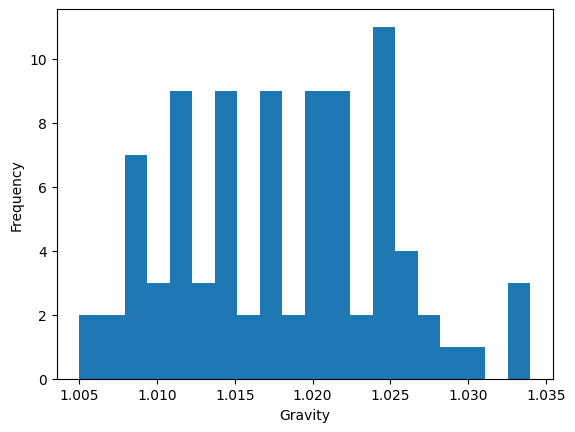

In [14]:
# Check for missing values
print(df.isnull().sum())

# Compute summary statistics
print(df.describe())

# Create visualizations of the data
plt.hist(df['gravity'], bins=20)
plt.xlabel('Gravity')
plt.ylabel('Frequency')
plt.show()

In [15]:
# compute the correlation matrix
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)


          gravity        ph      osmo      cond      urea      calc    target
gravity  1.000000 -0.328780  0.846836  0.575920  0.790409  0.510105  0.365280
ph      -0.328780  1.000000 -0.235852 -0.058851 -0.284943 -0.113775 -0.087613
osmo     0.846836 -0.235852  1.000000  0.820609  0.891854  0.551825  0.156219
cond     0.575920 -0.058851  0.820609  1.000000  0.543052  0.385034  0.028540
urea     0.790409 -0.284943  0.891854  0.543052  1.000000  0.551690  0.156647
calc     0.510105 -0.113775  0.551825  0.385034  0.551690  1.000000  0.464382
target   0.365280 -0.087613  0.156219  0.028540  0.156647  0.464382  1.000000


<Axes: >

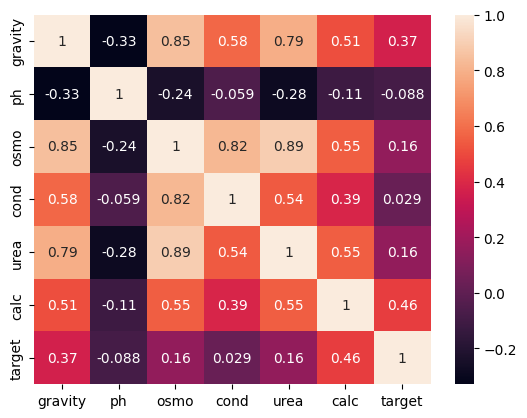

In [16]:
import seaborn as sns

# plot the heatmap
sns.heatmap(corr_matrix, annot=True)

## **Observation :**

- We can Observe that the Osmolarity of kideny is more corelated conductivity of urine.
- The ph level of urine is least related to any other feature in dataset.
- Urea concentration of Urine is more related to Osmolarity of Urine.

## Training different models and checking its performance metrics

Accuracy: 0.7407407407407407
Confusion matrix: [[11  4]
 [ 3  9]]


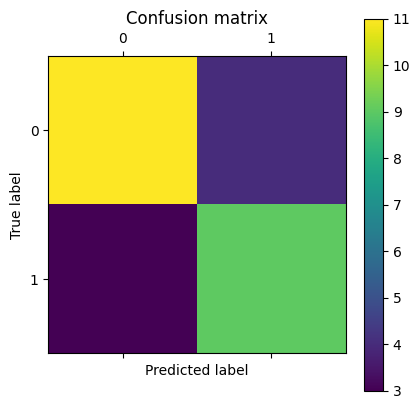

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion matrix:', cm)

# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

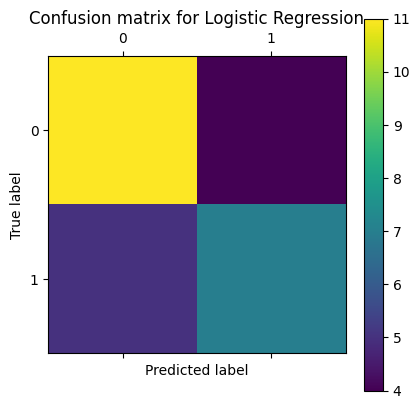

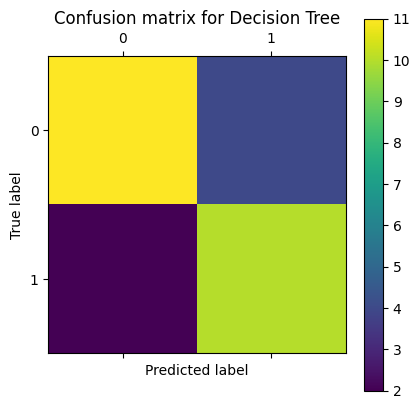

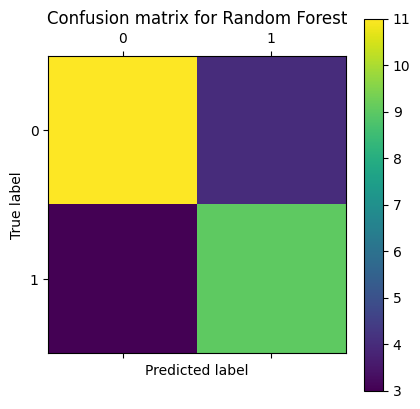

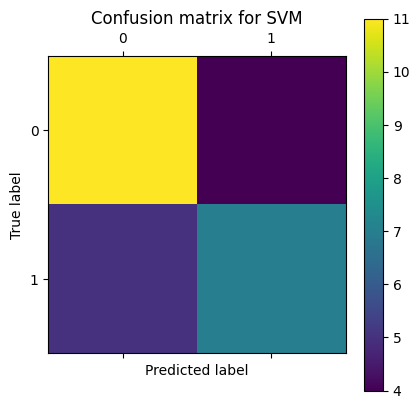

                     Accuracy  Precision    Recall  Specificity
Classifier                                                     
Logistic Regression  0.666667   0.636364  0.583333     0.733333
Decision Tree        0.777778   0.714286  0.833333     0.733333
Random Forest        0.740741   0.692308  0.750000     0.733333
SVM                  0.666667   0.636364  0.583333     0.733333


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

# Load the dataset
# df = pd.read_csv('dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Define the classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear')

classifiers = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm}

# Train and evaluate each classifier
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'Specificity': []}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)

    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Specificity'].append(specificity)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm)
    plt.title('Confusion matrix for ' + name)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Print the results in a table
df_results = pd.DataFrame(results)
df_results = df_results.set_index('Classifier')

print(df_results)


## Using Gradient Boosting Classifier

Accuracy: 0.7037037037037037
Precision: 0.6428571428571429
Recall: 0.75
F1 score: 0.6923076923076924
Confusion matrix:
[[10  5]
 [ 3  9]]


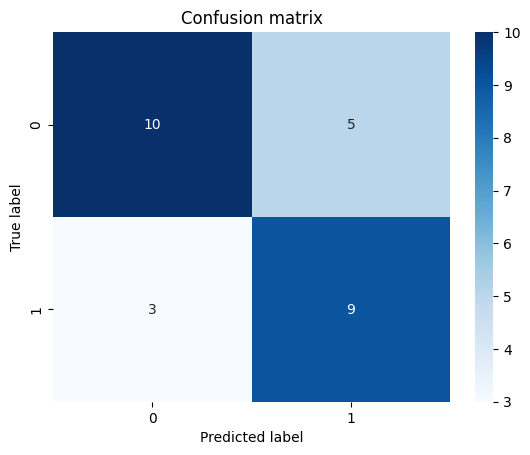

In [29]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Train a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:')
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## **Observations :**

- Accuracy of the model is 0.7037037037037037, which means the model is correctly predicting 70.37% of the cases.

- Precision of the model is 0.6428571428571429, which means out of all the cases the model predicted as positive, only 64.28% of them are actually positive.

- Recall of the model is 0.75, which means out of all the actual positive cases, the model predicted 75% of them as positive.

- F1 score of the model is 0.6923076923076924, which is the harmonic mean of precision and recall. It indicates the overall performance of the model in terms of both precision and recall.

- The confusion matrix shows that the model has misclassified 5 samples of the first class and 3 samples of the second class. It correctly predicted 10 samples of the first class and 9 samples of the second class.

## Using Artificial Neural Network form Keras

Epoch 1/150
2/2 [==============================] - 1s 12ms/step - loss: 67.5040 - accuracy: 0.4762
Epoch 2/150
2/2 [==============================] - 0s 8ms/step - loss: 53.0766 - accuracy: 0.4762
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 40.1037 - accuracy: 0.4762
Epoch 4/150
2/2 [==============================] - 0s 9ms/step - loss: 26.2376 - accuracy: 0.4762
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 13.6505 - accuracy: 0.4921
Epoch 6/150
2/2 [==============================] - 0s 7ms/step - loss: 3.9233 - accuracy: 0.5079
Epoch 7/150
2/2 [==============================] - 0s 7ms/step - loss: 6.6595 - accuracy: 0.5238
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 9.9365 - accuracy: 0.5238
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 10.4415 - accuracy: 0.5238
Epoch 10/150
2/2 [==============================] - 0s 8ms/step - loss: 8.8992 - accuracy: 0.5238
Epoch 11/150
2/2 [====

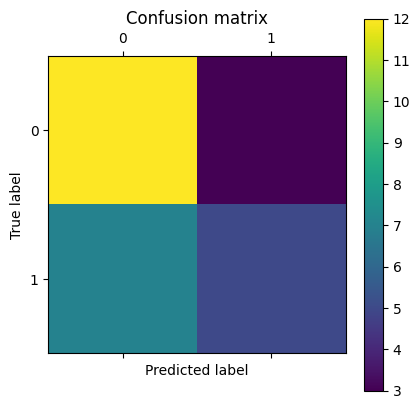

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion matrix:', cm)

# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Observations :**

- The accuracy of the model is 0.63 or 63%, which means that the model correctly predicted 63% of the test data labels. The confusion matrix shows that there are a total of 15 test data points in the first class and 12 test data points in the second class. 

- Out of these, the model correctly predicted 12 samples of the first class and 5 samples of the second class. However, the model misclassified 3 samples of the first class as the second class and 7 samples of the second class as the first class.

## Performing Grid Search to find Optimal parameters

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Define the neural network model as a function
def create_model(units_1=84, units_2=42, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units_1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units_2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Create a Keras classifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'units_1': [64, 84, 128],
    'units_2': [32, 42, 64],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the results
print('Best parameters:', grid_result.best_params_)
print('Best score:', grid_result.best_score_)

# Make predictions on the test set using the best model
best_model = grid_result.best_estimator_
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion matrix:', cm)


<ipython-input-37-6d90a08d51ac>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=0)


Best parameters: {'optimizer': 'adam', 'units_1': 64, 'units_2': 32}
Best score: 0.6666666865348816
1/1 [==============================] - 0s 61ms/step
Accuracy: 0.48148148148148145
Confusion matrix: [[12  3]
 [11  1]]


## **Observations :**

- The output suggests that the best parameters found by the GridSearchCV are {'optimizer': 'adam', 'units_1': 64, 'units_2': 32}, and the corresponding best score is 0.6666666865348816.

- However, when these parameters are used to train the model and make predictions on the test set, the accuracy is found to be 0.48148148148148145, which is relatively low. The confusion matrix shows that the model is not performing well in predicting both classes, as it has misclassified 12 out of 15 samples of the first class and 11 out of 12 samples of the second class.

- Therefore, even though the GridSearchCV has found the best parameters, they may not necessarily result in a high-performing model. It is possible that more complex models or additional feature engineering may be required to improve the accuracy of the model.

## **Conclusion :**

- After analyzing different methods applied above, it appears that traditional machine learning algorithms are giving good results especially Decision Trees.

- However, the Neural Network's result was not satisfactory, but we can still fine-tune the model by adjusting hyperparameters or adding more data.

- It's evident that the dataset is insufficient in size, and we might need more data to improve the model's performance.